# Sign Game Server

Game Plan:

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sign_game.ml.landmarks import Landmarks

2023-03-13 13:04:37.777646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 13:04:38.924619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 13:04:38.924650: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 13:04:39.208246: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-13 13:04:42.340850: W tensorflow/stream_executor/platform/de

In [2]:
landmark = Landmarks()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


## Dataset Preprocessing

In [3]:
# Train Dataset
df_train = pd.read_csv('../raw_data/asl_dataset/test.csv')

In [4]:
df_train.columns

Index(['Unnamed: 0', 'WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X',
       'THUMB_CMC_Y', 'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y',
       'THUMB_MCP_Z', 'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X',
       'THUMB_TIP_Y', 'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X',
       'INDEX_FINGER_MCP_Y', 'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X',
       'INDEX_FINGER_PIP_Y', 'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X',
       'INDEX_FINGER_DIP_Y', 'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X',
       'INDEX_FINGER_TIP_Y', 'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X',
       'MIDDLE_FINGER_MCP_Y', 'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X',
       'MIDDLE_FINGER_PIP_Y', 'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X',
       'MIDDLE_FINGER_DIP_Y', 'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X',
       'MIDDLE_FINGER_TIP_Y', 'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X',
       'RING_FINGER_MCP_Y', 'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X',
       'RING_FINGER_PIP_Y', 'RING_FINGER_PIP_Z', 'RING_FINGER

In [6]:
df_train = df_train.drop(columns=df_train.columns[[0, -1]], axis=1)
df_train.columns

Index(['WRIST_X', 'WRIST_Y', 'WRIST_Z', 'THUMB_CMC_X', 'THUMB_CMC_Y',
       'THUMB_CMC_Z', 'THUMB_MCP_X', 'THUMB_MCP_Y', 'THUMB_MCP_Z',
       'THUMB_IP_X', 'THUMB_IP_Y', 'THUMB_IP_Z', 'THUMB_TIP_X', 'THUMB_TIP_Y',
       'THUMB_TIP_Z', 'INDEX_FINGER_MCP_X', 'INDEX_FINGER_MCP_Y',
       'INDEX_FINGER_MCP_Z', 'INDEX_FINGER_PIP_X', 'INDEX_FINGER_PIP_Y',
       'INDEX_FINGER_PIP_Z', 'INDEX_FINGER_DIP_X', 'INDEX_FINGER_DIP_Y',
       'INDEX_FINGER_DIP_Z', 'INDEX_FINGER_TIP_X', 'INDEX_FINGER_TIP_Y',
       'INDEX_FINGER_TIP_Z', 'MIDDLE_FINGER_MCP_X', 'MIDDLE_FINGER_MCP_Y',
       'MIDDLE_FINGER_MCP_Z', 'MIDDLE_FINGER_PIP_X', 'MIDDLE_FINGER_PIP_Y',
       'MIDDLE_FINGER_PIP_Z', 'MIDDLE_FINGER_DIP_X', 'MIDDLE_FINGER_DIP_Y',
       'MIDDLE_FINGER_DIP_Z', 'MIDDLE_FINGER_TIP_X', 'MIDDLE_FINGER_TIP_Y',
       'MIDDLE_FINGER_TIP_Z', 'RING_FINGER_MCP_X', 'RING_FINGER_MCP_Y',
       'RING_FINGER_MCP_Z', 'RING_FINGER_PIP_X', 'RING_FINGER_PIP_Y',
       'RING_FINGER_PIP_Z', 'RING_FINGER_DIP_X', 'RING

In [8]:
df_train.head()

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,TARGET
0,0.580146,0.730645,-1.177116e-06,0.473765,0.671982,-0.048995,0.387580,0.538928,-0.069621,0.441531,...,0.695745,0.415271,-0.096098,0.671739,0.495591,-0.073339,0.664304,0.510604,-0.047599,S
1,0.445952,0.761564,-5.865483e-07,0.341784,0.663544,-0.049271,0.302874,0.512108,-0.071219,0.395074,...,0.649678,0.354256,-0.068198,0.641034,0.366634,-0.072729,0.621034,0.409713,-0.072052,E
2,0.225931,0.832181,1.781775e-06,0.387265,0.749331,0.024833,0.521656,0.661899,0.017178,0.645383,...,0.408083,0.353560,-0.073689,0.495536,0.308308,-0.076379,0.574876,0.282047,-0.078049,C
3,0.539091,0.918612,-5.109345e-07,0.645941,0.846850,-0.006828,0.677403,0.755252,0.004011,0.601994,...,0.389593,0.665900,0.069766,0.418992,0.735415,0.093706,0.444080,0.775207,0.114414,X
4,0.732511,0.814176,7.756363e-08,0.636504,0.784360,-0.085297,0.522966,0.728116,-0.153700,0.417040,...,0.848234,0.502867,-0.185572,0.827085,0.601483,-0.153147,0.784853,0.626364,-0.114238,L


In [9]:
df_train = df_train.dropna()

In [10]:
X_train = df_train.drop(columns=['TARGET'])
y_train = df_train['TARGET']

In [11]:
y_train.value_counts()

F    1911
K    1875
L    1873
D    1860
Z    1829
E    1810
X    1793
B    1774
R    1771
A    1764
I    1740
Y    1735
W    1715
O    1706
V    1701
T    1689
C    1681
J    1665
G    1629
S    1627
H    1530
Q    1390
M    1365
U    1347
P    1300
N    1220
Name: TARGET, dtype: int64

In [12]:
lab = LabelEncoder()
y_train_encoded = lab.fit_transform(y_train)
y_train_encoded

array([18,  4,  2, ...,  6, 21,  2])

In [13]:
y_train_dic = dict(zip(y_train_encoded, y_train))
y_train_dic

{18: 'S',
 4: 'E',
 2: 'C',
 23: 'X',
 11: 'L',
 21: 'V',
 16: 'Q',
 14: 'O',
 19: 'T',
 9: 'J',
 22: 'W',
 20: 'U',
 17: 'R',
 12: 'M',
 1: 'B',
 8: 'I',
 0: 'A',
 6: 'G',
 25: 'Z',
 7: 'H',
 13: 'N',
 15: 'P',
 5: 'F',
 10: 'K',
 3: 'D',
 24: 'Y'}

In [15]:
X_train.shape, y_train_encoded.shape

((43300, 63), (43300,))

### Normalize Training Data

In [17]:
df_train.head()

,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,THUMB_IP_X,...,PINKY_PIP_X,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,TARGET
0,0.580146,0.730645,-1.177116e-06,0.473765,0.671982,-0.048995,0.387580,0.538928,-0.069621,0.441531,...,0.695745,0.415271,-0.096098,0.671739,0.495591,-0.073339,0.664304,0.510604,-0.047599,S
1,0.445952,0.761564,-5.865483e-07,0.341784,0.663544,-0.049271,0.302874,0.512108,-0.071219,0.395074,...,0.649678,0.354256,-0.068198,0.641034,0.366634,-0.072729,0.621034,0.409713,-0.072052,E
2,0.225931,0.832181,1.781775e-06,0.387265,0.749331,0.024833,0.521656,0.661899,0.017178,0.645383,...,0.408083,0.353560,-0.073689,0.495536,0.308308,-0.076379,0.574876,0.282047,-0.078049,C
3,0.539091,0.918612,-5.109345e-07,0.645941,0.846850,-0.006828,0.677403,0.755252,0.004011,0.601994,...,0.389593,0.665900,0.069766,0.418992,0.735415,0.093706,0.444080,0.775207,0.114414,X
4,0.732511,0.814176,7.756363e-08,0.636504,0.784360,-0.085297,0.522966,0.728116,-0.153700,0.417040,...,0.848234,0.502867,-0.185572,0.827085,0.601483,-0.153147,0.784853,0.626364,-0.114238,L


In [19]:
from sign_game.ml.landmarks_utils import normalize_handmarks_per_image

df_train_norm=normalize_handmarks_per_image(df_train)

In [21]:
X_train_norm = df_train_norm.drop(columns=['TARGET'])

## Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

params={'penalty': [None, 'l2', 'l1'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
search = GridSearchCV(SGDClassifier(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
search.fit(X_train, y_train_encoded)
search.best_params_

{'alpha': 0.0001, 'penalty': None}

### Normalized Data

In [25]:
params2={'penalty': [None, 'l2', 'l1'], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
search2 = GridSearchCV(SGDClassifier(),
                      param_grid=params2,
                      scoring='accuracy',
                      cv=5)
search2.fit(X_train_norm, y_train_encoded)
search2.best_params_

{'alpha': 0.0001, 'penalty': None}

## SGD Model

In [27]:
%%time
sgd = SGDClassifier(alpha=0.0001, penalty=None)
sgd.fit(X_train, y_train_encoded)

CPU times: user 4.86 s, sys: 1.06 ms, total: 4.86 s
Wall time: 4.86 s


SGDClassifier(penalty=None)

In [29]:
%%time
sgd2 = SGDClassifier(alpha=0.0001, penalty=None)
sgd2.fit(X_train_norm, y_train_encoded)

CPU times: user 9.43 s, sys: 0 ns, total: 9.43 s
Wall time: 9.43 s


SGDClassifier(penalty=None)

## Predict

In [30]:
df_test = pd.read_csv('../raw_data/asl_dataset/test.csv')
df_test

,Unnamed: 0,WRIST_X,WRIST_Y,WRIST_Z,THUMB_CMC_X,THUMB_CMC_Y,THUMB_CMC_Z,THUMB_MCP_X,THUMB_MCP_Y,THUMB_MCP_Z,...,PINKY_PIP_Y,PINKY_PIP_Z,PINKY_DIP_X,PINKY_DIP_Y,PINKY_DIP_Z,PINKY_TIP_X,PINKY_TIP_Y,PINKY_TIP_Z,TARGET,PATH
0,128724,0.580146,0.730645,-1.177116e-06,0.473765,0.671982,-0.048995,0.387580,0.538928,-0.069621,...,0.415271,-0.096098,0.671739,0.495591,-0.073339,0.664304,0.510604,-0.047599,S,./asl_dataset_landmarks/S/S855.jpg
1,19705,0.445952,0.761564,-5.865483e-07,0.341784,0.663544,-0.049271,0.302874,0.512108,-0.071219,...,0.354256,-0.068198,0.641034,0.366634,-0.072729,0.621034,0.409713,-0.072052,E,./asl_dataset_landmarks/E/qApAjy28wQ-.jpeg
2,169717,0.225931,0.832181,1.781775e-06,0.387265,0.749331,0.024833,0.521656,0.661899,0.017178,...,0.353560,-0.073689,0.495536,0.308308,-0.076379,0.574876,0.282047,-0.078049,C,./asl_dataset_landmarks/C/L0WuF7Acns-.jpeg
3,122999,0.539091,0.918612,-5.109345e-07,0.645941,0.846850,-0.006828,0.677403,0.755252,0.004011,...,0.665900,0.069766,0.418992,0.735415,0.093706,0.444080,0.775207,0.114414,X,./asl_dataset_landmarks/X/pu6P8WEOdO-.jpeg
4,25843,0.732511,0.814176,7.756363e-08,0.636504,0.784360,-0.085297,0.522966,0.728116,-0.153700,...,0.502867,-0.185572,0.827085,0.601483,-0.153147,0.784853,0.626364,-0.114238,L,./asl_dataset_landmarks/L/1807.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51855,189312,0.741618,0.645042,2.154786e-07,0.770277,0.579488,-0.085343,0.782202,0.506932,-0.149878,...,0.695811,-0.167554,0.657868,0.686865,-0.172817,0.702142,0.666721,-0.157109,Z,./asl_dataset_landmarks/Z/XFgcjcVCaX-.jpeg
51856,35288,0.137764,0.510845,-2.493652e-07,0.147000,0.370611,-0.053444,0.240493,0.247799,-0.080846,...,0.565702,-0.180807,0.390456,0.543748,-0.165693,0.316944,0.524513,-0.132549,G,./asl_dataset_landmarks/G/G2457.jpg
51857,36185,0.137497,0.557135,-6.068033e-07,0.175437,0.396056,-0.011387,0.259040,0.284953,-0.009870,...,0.440237,-0.074310,0.396895,0.424846,-0.061589,0.335858,0.431777,-0.037805,G,./asl_dataset_landmarks/G/205.jpg
51858,256719,0.281278,0.972573,1.029575e-06,0.193043,0.919504,-0.061134,0.130964,0.825261,-0.102737,...,0.726585,-0.159835,0.281542,0.781124,-0.155015,0.261030,0.821271,-0.138690,V,./asl_dataset_landmarks/V/449.jpg


In [31]:
df_test = df_test.drop(columns=df_test.columns[[0, -1]], axis=1)
df_test = df_test.dropna()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43300 entries, 0 to 51859
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WRIST_X              43300 non-null  float64
 1   WRIST_Y              43300 non-null  float64
 2   WRIST_Z              43300 non-null  float64
 3   THUMB_CMC_X          43300 non-null  float64
 4   THUMB_CMC_Y          43300 non-null  float64
 5   THUMB_CMC_Z          43300 non-null  float64
 6   THUMB_MCP_X          43300 non-null  float64
 7   THUMB_MCP_Y          43300 non-null  float64
 8   THUMB_MCP_Z          43300 non-null  float64
 9   THUMB_IP_X           43300 non-null  float64
 10  THUMB_IP_Y           43300 non-null  float64
 11  THUMB_IP_Z           43300 non-null  float64
 12  THUMB_TIP_X          43300 non-null  float64
 13  THUMB_TIP_Y          43300 non-null  float64
 14  THUMB_TIP_Z          43300 non-null  float64
 15  INDEX_FINGER_MCP_X   43300 non-null 

In [32]:
X_test = df_test.drop(columns=['TARGET'])
y_test = df_test['TARGET']

In [33]:
y_preds = sgd.predict(X_test)
y_preds

array([18,  4,  3, ...,  6, 21,  2])

In [34]:
letter_preds = [y_train_dic[y_pred] for y_pred in y_preds]
letter_preds

['S',
 'E',
 'D',
 'L',
 'L',
 'V',
 'Q',
 'X',
 'L',
 'O',
 'Q',
 'T',
 'S',
 'J',
 'V',
 'S',
 'W',
 'S',
 'R',
 'M',
 'B',
 'V',
 'I',
 'A',
 'V',
 'A',
 'G',
 'S',
 'E',
 'R',
 'R',
 'S',
 'Q',
 'Z',
 'J',
 'H',
 'A',
 'S',
 'M',
 'E',
 'J',
 'B',
 'V',
 'M',
 'Z',
 'T',
 'X',
 'P',
 'T',
 'Z',
 'F',
 'V',
 'C',
 'L',
 'Y',
 'P',
 'A',
 'B',
 'N',
 'G',
 'B',
 'F',
 'M',
 'H',
 'W',
 'I',
 'K',
 'D',
 'R',
 'K',
 'M',
 'F',
 'W',
 'U',
 'J',
 'J',
 'Y',
 'D',
 'J',
 'E',
 'H',
 'Z',
 'L',
 'L',
 'V',
 'U',
 'Q',
 'R',
 'G',
 'O',
 'J',
 'S',
 'N',
 'K',
 'E',
 'W',
 'A',
 'M',
 'Q',
 'I',
 'G',
 'A',
 'J',
 'V',
 'H',
 'T',
 'P',
 'Q',
 'Z',
 'A',
 'O',
 'Y',
 'S',
 'O',
 'N',
 'O',
 'B',
 'V',
 'M',
 'Z',
 'H',
 'Z',
 'W',
 'G',
 'H',
 'G',
 'U',
 'U',
 'I',
 'F',
 'A',
 'G',
 'G',
 'H',
 'O',
 'W',
 'G',
 'G',
 'X',
 'J',
 'I',
 'U',
 'R',
 'A',
 'I',
 'B',
 'T',
 'J',
 'W',
 'X',
 'K',
 'A',
 'V',
 'W',
 'B',
 'G',
 'X',
 'U',
 'L',
 'B',
 'W',
 'M',
 'O',
 'C',
 'R',
 'G',
 'Q'

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

def evaluate_matrix(y_true, y_pred):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
    plt.close(1) # don't display pre-sized matrix
    fig, ax = plt.subplots(figsize=(12, 12))
    disp.plot(ax=ax)
    print(classification_report(y_true, y_pred))
    plt.show()

In [37]:
def evaluate_model(y_test, y_pred):
#     # Preditions on holdout test dataset
#     y_pred = model.predict(X_test)
#     y_pred = np.argmax(y_pred, axis=1)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=range(26), columns=range(26))
    plt.figure(figsize=(10, 8))
    plt.title('Model Confusion Matrix')
    plt.xlabel('Predicted Letter')
    plt.ylabel('True Letter')
    plt.xticks(range(26), labels=range(26))
    plt.yticks(range(26), labels=range(26))
    plt.imshow(cm_df, cmap='Blues')
    plt.colorbar()
    plt.show()
    
    # Calculate classification report
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print('Accuracy:', accuracy)

              precision    recall  f1-score   support

           A       0.91      0.83      0.87      1764
           B       0.91      0.96      0.94      1774
           C       0.95      0.84      0.89      1681
           D       0.95      0.94      0.94      1860
           E       0.87      0.89      0.88      1810
           F       0.98      0.96      0.97      1911
           G       0.80      0.87      0.84      1629
           H       0.86      0.83      0.84      1530
           I       0.93      0.85      0.89      1740
           J       0.83      0.87      0.85      1665
           K       0.95      0.88      0.91      1875
           L       0.95      0.92      0.93      1873
           M       0.77      0.86      0.81      1365
           N       0.94      0.72      0.82      1220
           O       0.91      0.90      0.91      1706
           P       0.92      0.87      0.89      1300
           Q       0.87      0.86      0.86      1390
           R       0.88    

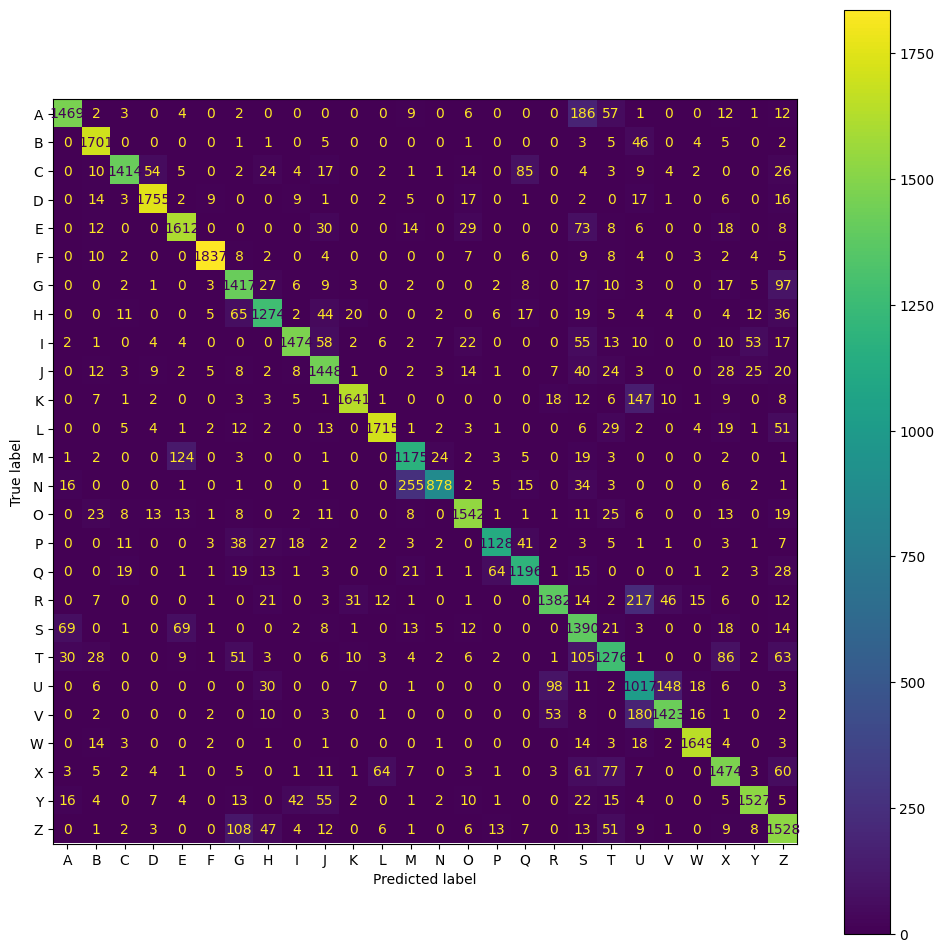

In [38]:
evaluate_matrix(y_test, letter_preds)

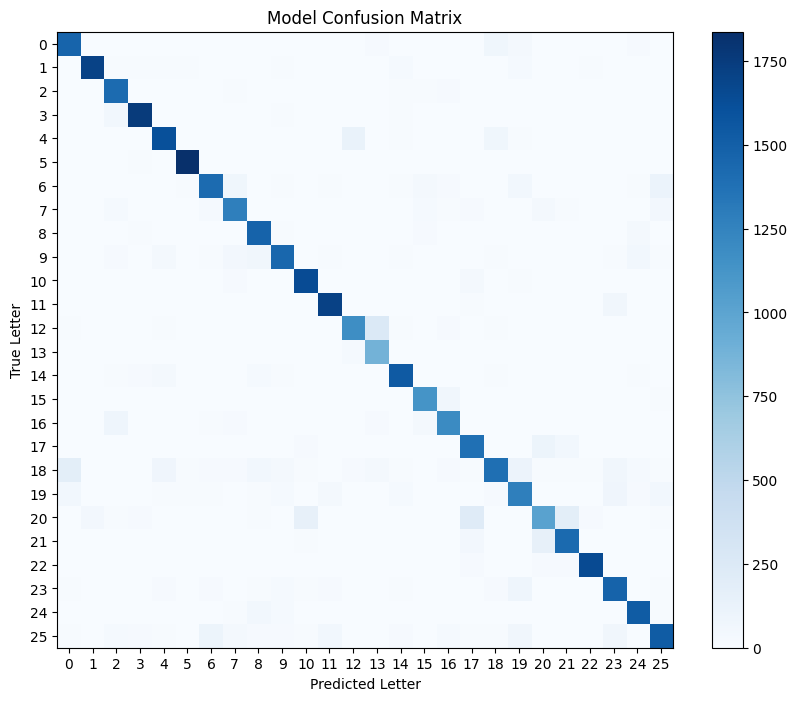

              precision    recall  f1-score   support

           A       0.83      0.91      0.87      1606
           B       0.96      0.91      0.94      1861
           C       0.84      0.95      0.89      1490
           D       0.94      0.95      0.94      1856
           E       0.89      0.87      0.88      1852
           F       0.96      0.98      0.97      1873
           G       0.87      0.80      0.84      1764
           H       0.83      0.86      0.84      1487
           I       0.85      0.93      0.89      1578
           J       0.87      0.83      0.85      1747
           K       0.88      0.95      0.91      1721
           L       0.92      0.95      0.93      1814
           M       0.86      0.77      0.81      1526
           N       0.72      0.94      0.82       930
           O       0.90      0.91      0.91      1698
           P       0.87      0.92      0.89      1228
           Q       0.86      0.87      0.86      1382
           R       0.78    

In [39]:
evaluate_model(letter_preds, y_test)

### Normalized Data

In [41]:
df_test_norm=normalize_handmarks_per_image(df_test)

In [42]:
X_test_norm = df_test_norm.drop(columns=['TARGET'])

In [43]:
y_preds2 = sgd2.predict(X_test_norm)
y_preds2

array([18,  4,  2, ...,  6, 21,  2])

In [44]:
letter_preds2 = [y_train_dic[y_pred2] for y_pred2 in y_preds2]
letter_preds2

['S',
 'E',
 'C',
 'X',
 'L',
 'V',
 'Q',
 'X',
 'L',
 'O',
 'Q',
 'T',
 'S',
 'J',
 'V',
 'S',
 'W',
 'S',
 'R',
 'M',
 'B',
 'V',
 'I',
 'A',
 'V',
 'A',
 'G',
 'S',
 'S',
 'U',
 'R',
 'S',
 'Q',
 'Z',
 'J',
 'H',
 'A',
 'S',
 'M',
 'E',
 'J',
 'B',
 'V',
 'M',
 'Z',
 'T',
 'X',
 'P',
 'T',
 'G',
 'F',
 'U',
 'C',
 'L',
 'J',
 'P',
 'A',
 'B',
 'N',
 'G',
 'B',
 'F',
 'M',
 'H',
 'W',
 'I',
 'K',
 'D',
 'R',
 'K',
 'M',
 'F',
 'W',
 'R',
 'J',
 'J',
 'Y',
 'D',
 'J',
 'E',
 'H',
 'Z',
 'L',
 'L',
 'V',
 'U',
 'Q',
 'R',
 'G',
 'O',
 'J',
 'J',
 'N',
 'K',
 'E',
 'W',
 'A',
 'N',
 'Q',
 'I',
 'P',
 'M',
 'J',
 'V',
 'H',
 'T',
 'P',
 'Q',
 'Z',
 'A',
 'O',
 'Y',
 'S',
 'O',
 'N',
 'O',
 'B',
 'V',
 'M',
 'Z',
 'H',
 'Z',
 'W',
 'G',
 'H',
 'G',
 'K',
 'V',
 'I',
 'J',
 'A',
 'G',
 'G',
 'H',
 'O',
 'W',
 'H',
 'G',
 'X',
 'J',
 'I',
 'U',
 'U',
 'A',
 'I',
 'B',
 'J',
 'J',
 'X',
 'X',
 'K',
 'A',
 'U',
 'W',
 'B',
 'G',
 'T',
 'U',
 'L',
 'B',
 'H',
 'M',
 'O',
 'C',
 'R',
 'G',
 'Q'

              precision    recall  f1-score   support

           A       0.94      0.90      0.92      1764
           B       0.95      0.97      0.96      1774
           C       0.96      0.92      0.94      1681
           D       0.98      0.97      0.97      1860
           E       0.94      0.93      0.93      1810
           F       0.96      0.97      0.97      1911
           G       0.80      0.90      0.85      1629
           H       0.89      0.89      0.89      1530
           I       0.93      0.91      0.92      1740
           J       0.92      0.91      0.91      1665
           K       0.94      0.93      0.94      1875
           L       0.96      0.96      0.96      1873
           M       0.86      0.93      0.89      1365
           N       0.93      0.87      0.90      1220
           O       0.94      0.95      0.95      1706
           P       0.92      0.93      0.92      1300
           Q       0.89      0.86      0.87      1390
           R       0.88    

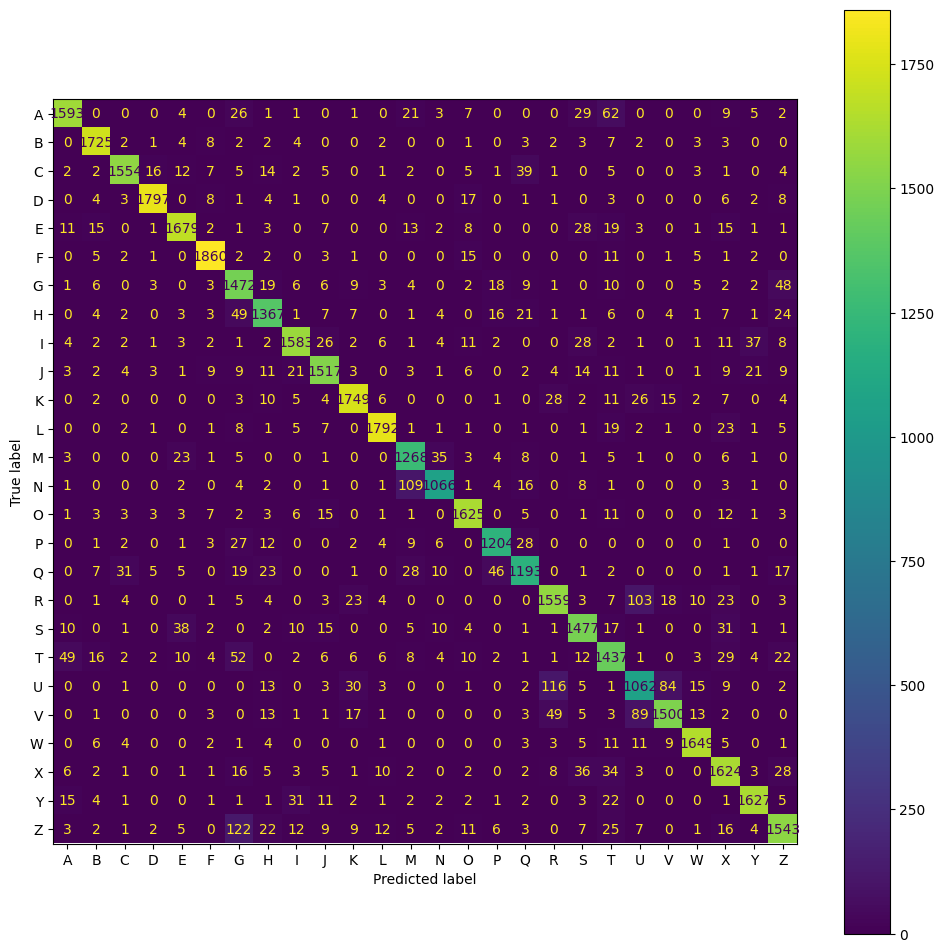

In [45]:
evaluate_matrix(y_test, letter_preds2)

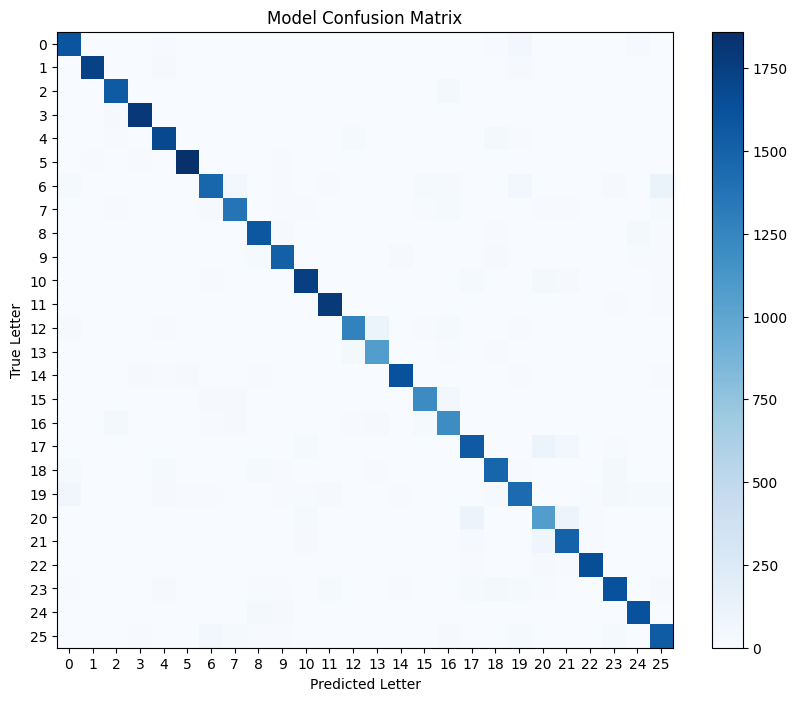

              precision    recall  f1-score   support

           A       0.90      0.94      0.92      1702
           B       0.97      0.95      0.96      1810
           C       0.92      0.96      0.94      1622
           D       0.97      0.98      0.97      1836
           E       0.93      0.94      0.93      1794
           F       0.97      0.96      0.97      1928
           G       0.90      0.80      0.85      1833
           H       0.89      0.89      0.89      1540
           I       0.91      0.93      0.92      1694
           J       0.91      0.92      0.91      1652
           K       0.93      0.94      0.94      1863
           L       0.96      0.96      0.96      1858
           M       0.93      0.86      0.89      1483
           N       0.87      0.93      0.90      1150
           O       0.95      0.94      0.95      1732
           P       0.93      0.92      0.92      1305
           Q       0.86      0.89      0.87      1343
           R       0.88    

In [46]:
evaluate_model(letter_preds2, y_test)